<a href="https://colab.research.google.com/github/RafsanJany-44/Learning_Tensore/blob/main/Tensore_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing Libraries

In [2]:
import tensorflow as tf
import numpy as np
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR) #The key benefit of having the logging API provided by a standard library module is that all Python modules can participate in logging, so your application log can include your own messages integrated with messages from third-party modules.


#Set Up training data

In [3]:
celsius_q    = np.array([-40, -10,  0,  8, 15, 22,  38],  dtype=float)
fahrenheit_a = np.array([-40,  14, 32, 46, 59, 72, 100],  dtype=float)

for i,c in enumerate(celsius_q):
  print("{} degrees Celsius = {} degrees Fahrenheit".format(c, fahrenheit_a[i]))

-40.0 degrees Celsius = -40.0 degrees Fahrenheit
-10.0 degrees Celsius = 14.0 degrees Fahrenheit
0.0 degrees Celsius = 32.0 degrees Fahrenheit
8.0 degrees Celsius = 46.0 degrees Fahrenheit
15.0 degrees Celsius = 59.0 degrees Fahrenheit
22.0 degrees Celsius = 72.0 degrees Fahrenheit
38.0 degrees Celsius = 100.0 degrees Fahrenheit


#Creaating Model

###Defining. layers

<ul><li>input_shape=[1] — This specifies that the input to this layer is a single value. That is, the shape is a one-dimensional array with one member. Since this is the first (and only) layer, that input shape is the input shape of the entire model. The single value is a floating point number, representing degrees Celsius.</li>

<li>units=1 — This specifies the number of neurons in the layer. The number of neurons defines how many internal variables the layer has to try to learn how to solve the problem. Since this is the final layer, it is also the size of the model's output — a single float value representing degrees Fahrenheit. (In a multi-layered network, the size and shape of the layer would need to match the input_shape of the next layer.)</li></ul>

In [4]:
l0 = tf.keras.layers.Dense(units=1, input_shape=[1])

###Defining Model

In [5]:
model = tf.keras.Sequential([l0])

OR

In [6]:
model = tf.keras.Sequential([
  tf.keras.layers.Dense(units=1, input_shape=[1])
])

## Compile the model, with loss and optimizer functions

Before training, the model has to be compiled. When compiled for training, the model is given:

- **Loss function** — A way of measuring how far off predictions are from the desired outcome. (The measured difference is called the "loss".)

- **Optimizer function** — A way of adjusting internal values in order to reduce the loss.
  - One part of the Optimizer you may need to think about when building your own models is the learning rate (0.1 in the code above). This is the step size taken when adjusting values in the model. If the value is too small, it will take too many iterations to train the model. Too large, and accuracy goes down. Finding a good value often involves some trial and error, but the range is usually within 0.001 (default), and 0.1

In [7]:
model.compile(loss='mean_squared_error',
              optimizer=tf.keras.optimizers.Adam(0.1))

#Training Model

In [8]:
history = model.fit(celsius_q, fahrenheit_a, epochs=500, verbose=False)
print("Finished training the model")

Finished training the model


#Display training statistics

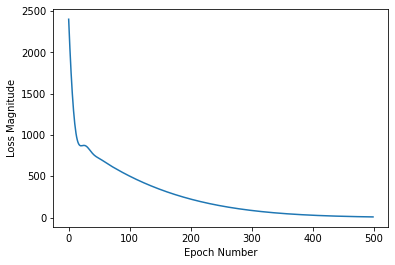

In [9]:
import matplotlib.pyplot as plt
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'])

#Use the model to predict values

In [10]:
print(model.predict([100.0]))

1/1 [==============================] - 0s 87ms/step
[[211.3285]]


In [11]:
print("Answer from formula: ",100*1.8+32)

Answer from formula:  212.0


#Looking at the layer weights

In [12]:
print("These are the layer variables (weaghts and bias): {}".format(l0.get_weights()))

These are the layer variables (weaghts and bias): [array([[-0.9959821]], dtype=float32), array([0.], dtype=float32)]


close to ~1.8 and ~32. 

#A little experiment


In [13]:
l0 = tf.keras.layers.Dense(units=4, input_shape=[1])
l1 = tf.keras.layers.Dense(units=4)
l2 = tf.keras.layers.Dense(units=1)
model = tf.keras.Sequential([l0, l1, l2])
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.1))
model.fit(celsius_q, fahrenheit_a, epochs=500, verbose=False)
print("Finished training the model")
print(model.predict([100.0]))
print("Model predicts that 100 degrees Celsius is: {} degrees Fahrenheit".format(model.predict([100.0])))
print("These are the l0 variables: {}".format(l0.get_weights()))
print("These are the l1 variables: {}".format(l1.get_weights()))
print("These are the l2 variables: {}".format(l2.get_weights()))

Finished training the model
1/1 [==============================] - 0s 63ms/step
[[211.74744]]
1/1 [==============================] - 0s 29ms/step
Model predicts that 100 degrees Celsius is: [[211.74744]] degrees Fahrenheit
These are the l0 variables: [array([[ 0.06377053,  0.18249   ,  0.26382768, -0.7039893 ]],
      dtype=float32), array([ 3.0836575, -2.6985059,  3.0918946, -3.2136881], dtype=float32)]
These are the l1 variables: [array([[ 0.01271667, -0.08936246, -1.3233552 ,  0.05484255],
       [ 0.3938543 , -0.7299988 ,  0.86489874,  0.03566832],
       [ 0.5974027 ,  0.02574405, -0.98982215,  0.2988095 ],
       [ 0.03947707,  0.2546905 ,  1.1230881 , -0.3431267 ]],
      dtype=float32), array([ 0.88773036, -2.5571516 , -3.210031  ,  2.3089387 ], dtype=float32)]
These are the l2 variables: [array([[ 0.25105274],
       [-0.01080038],
       [-1.5803081 ],
       [ 0.5982695 ]], dtype=float32), array([3.1498556], dtype=float32)]


As you can see, this model is also able to predict the corresponding Fahrenheit value really well. But when you look at the variables (weights) in the l0 and l1 layers, they are nothing even close to ~1.8 and ~32. The added complexity hides the "simple" form of the conversion equation.